#### referenced by - https://github.com/kuleshov/audio-super-res
# Predict & Get output files


In [1]:
import os
os.sys.path.append(os.path.abspath('.'))
os.sys.path.append(os.path.dirname(os.path.abspath('.')))
import numpy as np
import matplotlib
from asr_model import ASRNet, default_opt
from io_utils import upsample_wav
from io_utils import load_h5
import tensorflow as tf

In [2]:
args = {
    'ckpt'             : './default_log_name.lr0.000100.1.g4.b100/model.ckpt',
    'wav_file_list'    : './data/test.txt',
    'r'                : 6,
    'sr'               : 16000,
    'alg'              : 'adam',
    'epochs'           : 5,
    'logname'          : 'default_log_name',
    'layers'           : 4,
    'lr'               : 1e-3,
    'batch_size'       : 4,
    'out_label'        : 'asr_pred',
    'in_dir' : './data/test'
}
print(tf.__version__)

1.5.0


>> Generator Model init...
D-Block >>  Tensor("generator/Relu:0", shape=(?, ?, 12), dtype=float32)
D-Block >>  Tensor("generator/Relu_1:0", shape=(?, ?, 24), dtype=float32)
D-Block >>  Tensor("generator/Relu_2:0", shape=(?, ?, 48), dtype=float32)
D-Block >>  Tensor("generator/Relu_3:0", shape=(?, ?, 48), dtype=float32)
B-Block >>  Tensor("generator/Relu_4:0", shape=(?, ?, 48), dtype=float32)
U-Block >>  Tensor("generator/concat:0", shape=(?, ?, 96), dtype=float32)
U-Block >>  Tensor("generator/concat_1:0", shape=(?, ?, 96), dtype=float32)
U-Block >>  Tensor("generator/concat_2:0", shape=(?, ?, 48), dtype=float32)
U-Block >>  Tensor("generator/concat_3:0", shape=(?, ?, 24), dtype=float32)
Fin-Layer >>  Tensor("generator/Add:0", shape=(?, ?, 1), dtype=float32)
>> ...finish

creating train_op with params: {'lr': 0.001, 'layers': 4, 'alg': 'adam', 'batch_size': 4, 'b1': 0.9, 'b2': 0.999}
checkpoint: ./default_log_name.lr0.000100.1.g4.b100/model.ckpt
ckpt: ./default_log_name.lr0.000100.1.g4

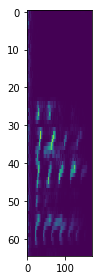

In [3]:
def evaluate(args):
    # load model
    model = get_model(args, 0, args['r'], from_ckpt=False, train=True)
    model.load(args['ckpt']) # from default checkpoint

    if args['wav_file_list']:
        with open(args['wav_file_list']) as f:
            for line in f:
                try:
                    filename = line.strip()
                    print(filename)
                    filename = os.path.join(args['in_dir'], filename)
                    upsample_wav(filename, args, model)
                except EOFError:
                    print('WARNING: Error reading file:', line.strip())


def get_model(args, n_dim, r, from_ckpt=False, train=True):
    """Create a model based on arguments"""  
    if train:
        opt_params = {
            'alg' : args['alg'], 
            'lr' : args['lr'], 
            'b1' : 0.9, 
            'b2' : 0.999,
            'batch_size': args['batch_size'], 
            'layers': args['layers']}
    else: 
        opt_params = default_opt

    # create model & init
    model = ASRNet(
        from_ckpt=from_ckpt, 
        n_dim=n_dim, 
        r=r,
        opt_params=opt_params, 
        log_prefix=args['logname'])
        
    return model

evaluate(args)